## **Recommender Systems**

#### **Q1:** How do we suggest new interests or products to our customers?

#### **Q2:** How can we build a recommender system?

A common data problem is producing recommendations of some sort. 

* Netflix recommends movies you might want to watch. 

* Amazon recommends products you might want to buy. 

* Twitter recommends users you might want to follow. 



#### **A first example with a tiny data set**

To understand how data can be used to make recommendations, we start by considering a tiny data set.



In [1]:
# Our data set is a python list containing users interests.
# Each element of the list contains the interests of a specific user.

users_interests = [
        ["Hadoop", "Big Data", "HBase", "Java", "Spark", "Storm", "Cassandra"],
        ["NoSQL", "MongoDB", "Cassandra", "HBase", "Postgres"],
        ["Python", "scikit-learn", "scipy", "numpy", "statsmodels", "pandas"],
        ["R", "Python", "statistics", "regression", "probability"],
        ["machine learning", "regression", "decision trees", "libsvm"],
        ["Python", "R", "Java", "C++", "Haskell", "programming languages"],
        ["statistics", "probability", "mathematics", "theory"],
        ["machine learning", "scikit-learn", "Mahout", "neural networks"],
        ["neural networks", "deep learning", "Big Data", "artificial intelligence"],
        ["Hadoop", "Java", "MapReduce", "Big Data"],
        ["statistics", "R", "statsmodels"],
        ["C++", "deep learning", "artificial intelligence", "probability"],
        ["pandas", "R", "Python"],
        ["databases", "HBase", "Postgres", "MySQL", "MongoDB"],
        ["libsvm", "regression", "support vector machines"]
]

# The interestes of user 0 are

users_interests[0]


['Hadoop', 'Big Data', 'HBase', 'Java', 'Spark', 'Storm', 'Cassandra']

## **Recommending What’s Popular**


One easy approach is to simply recommend what’s popular. 

* We do not take into account the current specified interests of the user.
  * We do filter current user's interests before suggesting new interests.


* Popularity based recommendations can be a good strategy for targeting new customers. 
  * Those for whome we do not have a history of interests.




#### **Q1:** How do we recommend popular interests?

In [2]:
from collections import Counter

# We count how many times each interest has been selected by users.
# We order them from the most common to the least common.

popular_interests = Counter(interest for user_interests in users_interests for interest in user_interests).most_common()

# ** NOTE **
#
# A Counter is a dict subclass for counting hashable objects. 
# It is a collection where elements are stored as dictionary 
# keys and their counts are stored as dictionary values. 
# Counts are allowed to be any integer value including zero or 
# negative counts.
# 
# Counter([iterable-or-mapping])
#   Counter iterates over the input elements and produces a 
#   dictionary with the elements as keys and their frequency 
#   as values. 
#
# most_common([n])
#   Return a list of the n most common elements and their 
#   counts from the most common to the least common.
#
# ** NOTE **

popular_interests[:5]

[('Python', 4), ('R', 4), ('Big Data', 3), ('HBase', 3), ('Java', 3)]

#### We suggest to a user the most popular interests that she’s not already interested in.

* We write a function that takes as input the user's interests and return as output the recommendations.

In [3]:
# The function takes as input a list of user's interests and
# return a list of suggestion of length <max_results>

def most_popular_new_interests(user_interests, max_results=5): 
    suggestions = [(interest, frequency) 
                    for interest, frequency in popular_interests
                    if interest not in user_interests ] 
  
    return suggestions[:max_results]

In [4]:
# We make recommendations for user 0

print(f"User's interests: {users_interests[0]}\n")
print(f"Suggestions:")
most_popular_new_interests(users_interests[0], 5)

User's interests: ['Hadoop', 'Big Data', 'HBase', 'Java', 'Spark', 'Storm', 'Cassandra']

Suggestions:


[('Python', 4),
 ('R', 4),
 ('statistics', 3),
 ('regression', 3),
 ('probability', 3)]

## **User-Based Collaborative Filtering**

We want to recommend new interests to users based on their currently specified interests.

#### **Q1:** How do we take into account user’s interests?

One way of taking a user’s interests into account is to look for users who are somehow ***similar*** to her, and then suggest the things that those users are interested in.


#### **Q2:** How do we represent users?

**Vectors:** We represent users with vectors of 0s and 1s. 

Each element of the vector represent a user interest, 0 means the user is not interested, 1 means the user is interested.


Example of user vector:
``
[1, 0, 1, 1, 1, 0, 1, 0]
``

#### **Q3:** How do we mesure **how similar** two users are?

**Cosine Similarity:** We will use a metric called ***cosine similarity***. This not the only metric we can apply, later in the lecture we will use another metric to mesure similarity.

We compute the cosine of the angle between users' interests (vectors).

The cosine similarity is defined as follows:

$cosine\_similarity$ ($A,B$) = $\cos(\theta) = \frac{A \cdot B}{\| A \| \| B \|}$

where: 

$A \cdot B$ is the dot product

$\| A \|$ is the Euclidean norm or magnitude of $A$




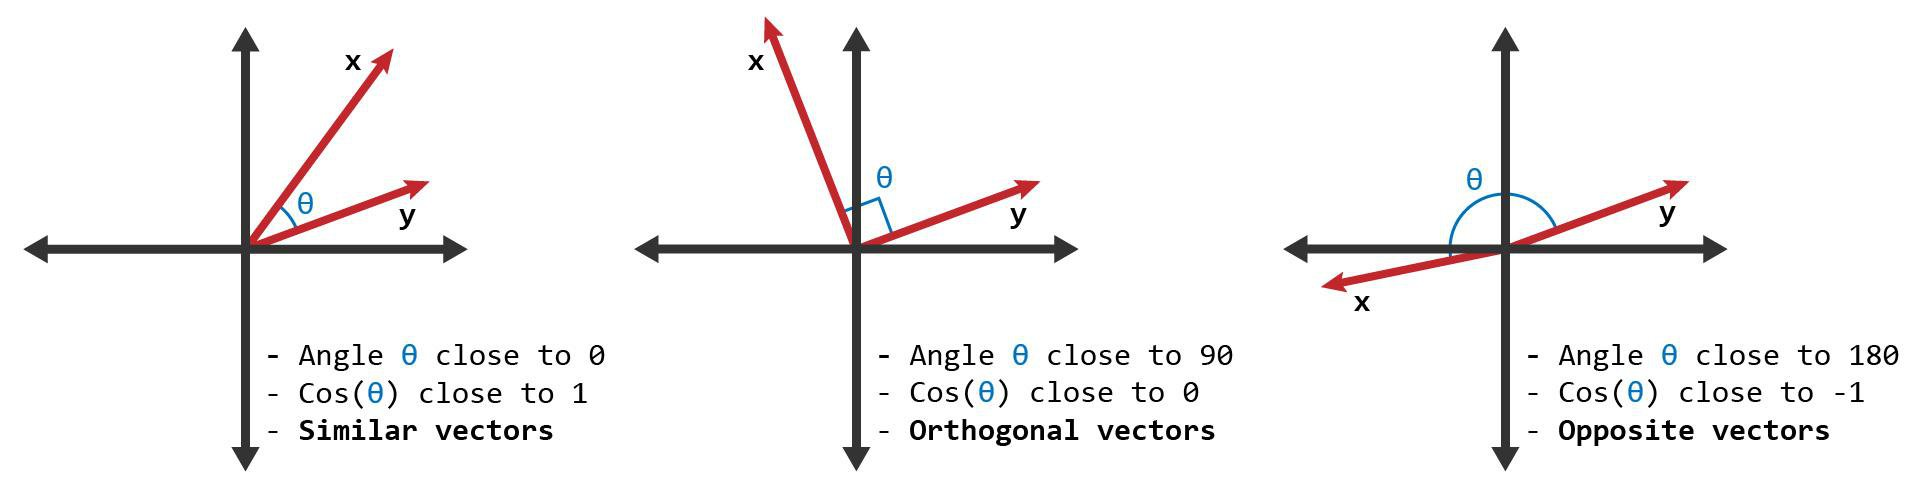

In [5]:
# We can compute the cosine similarity between two vectors as follows:

import math

def dot(a, b):
    return sum(a_i * b_i for a_i, b_i in zip(a, b))

def cosine_similarity(a, b):
    return dot(a, b) / math.sqrt(dot(a, a) * dot(b, b))

* If A and B point in the same direction, then the numerator and denominator are equal, and their cosine similarity equals 1. 
* If A and B point in opposite directions, then their cosine similarity equals -1. 
* If A and B are perpendicular they have a 90-degree angle between them and a cosine similarity of 0.

### **Users vectors**

* **Q1:** How do we create users vectors?

In [6]:
#
# We need to create the users vectors.
# Given the vector v, the element v[i] will be 1 if 
# the user has specified the i-th interest, 0 otherwise.
#

# 1. We create the ordered list of interests 

unique_interests = sorted( list( { interest 
                                  for user_interests in users_interests 
                                  for interest in user_interests }))

print("Ordered list")
print(unique_interests)

# 2. We create a function that produces the vectors.

def make_user_interest_vector(user_interests):
    return [1 if interest in user_interests else 0 
          for interest in unique_interests ]

users_interests[0].sort()
print("\nUser 0's interestes")
print(users_interests[0])
print("\nUser 0's vector")
print(make_user_interest_vector(users_interests[0]))

Ordered list
['Big Data', 'C++', 'Cassandra', 'HBase', 'Hadoop', 'Haskell', 'Java', 'Mahout', 'MapReduce', 'MongoDB', 'MySQL', 'NoSQL', 'Postgres', 'Python', 'R', 'Spark', 'Storm', 'artificial intelligence', 'databases', 'decision trees', 'deep learning', 'libsvm', 'machine learning', 'mathematics', 'neural networks', 'numpy', 'pandas', 'probability', 'programming languages', 'regression', 'scikit-learn', 'scipy', 'statistics', 'statsmodels', 'support vector machines', 'theory']

User 0's interestes
['Big Data', 'Cassandra', 'HBase', 'Hadoop', 'Java', 'Spark', 'Storm']

User 0's vector
[1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


### **Cosine Similarity**

* **Q1:** How do we compute the pairwise similarities between all of our users?

In [7]:
# 3. We create the user interest matrix. 
#    The rows of the matrix are the users,
#    the columns of the matrix are the interests.  
#    Each row of the matrix is a user vector.

user_interest_matrix = [ make_user_interest_vector(ui) for ui in users_interests]

#    user_interest_matrix[i][j] equals 1 if 
#    user i specified interest j, 0 otherwise.

print(f"User 0 - Interest 0 - Value: {user_interest_matrix[0][0]}")

User 0 - Interest 0 - Value: 1


#### How the *user_interest_matrix* looks like.

<img src="img/Example-4x3-binary-matrix-4-3-binary-matrix-representing-4-genes-and-3-samples_W640.jpg" alt="drawing" width="100"/>

In [8]:
# 4. We compute the pairwise similarities between all of our users.
#    We use the cosine_similarity() function to compute the similarity
#    between each pair of users.  

user_similarities = [ [cosine_similarity(interest_vector_i, interest_vector_j) 
                       for interest_vector_j in user_interest_matrix]
                     for interest_vector_i in user_interest_matrix]

#     user_similarities[i][j] gives us the similarity between users i and j.
                    
print("\nSimilarity of the pair (user 0, user 1)")
print(user_similarities[0][1])


Similarity of the pair (user 0, user 1)
0.3380617018914066


### **Recommendations**

#### **Q1:** How do we use pairwise similarities to make recommendations?

For each user we find the most similar users to the given user, and we sort them from the most similar to the least similar.

We suggest to the user other similar users' interests that the user did not yet select.


In [9]:

# 5. We find the most similar users to a given user.
#    We sort the results from the most similar to 
#    the least similar. We exclude the user herself, 
#    and any other users with zero similarity. 

def most_similar_users_to(user_id): 

    pairs = [(other_user_id, similarity)
            for other_user_id, similarity in enumerate(user_similarities[user_id])
            if user_id != other_user_id and similarity > 0]

    return sorted(pairs, key = lambda p : p[1],
                  reverse = True)

# 6. We suggest interests selected by similar users. 
#    We write a function that takes in input the user id and
#    returns as output the list of recommendations. 

from collections import defaultdict

def user_based_suggestions(user_id, include_current_interests=False): 
    suggestions = defaultdict(float)

    # We sum up all similarity values of similar products
    for (other_user_id, similarity) in most_similar_users_to(user_id): # similar users
        for interest in users_interests[other_user_id]: # user's interests
            suggestions[interest] += similarity

    suggestions = sorted(suggestions.items(), 
                       key=lambda s: s[1],
                       reverse=True)
    if include_current_interests: 
        return suggestions
    else:
        return [(suggestion, weight)
             for suggestion, weight in suggestions
             if suggestion not in users_interests[user_id] ] # exclude own interests
  


#### We are ready to suggest new interests to our users

In [10]:
# Let's see what we suggest to user 0

user_based_suggestions(0)[:5]

[('MapReduce', 0.5669467095138409),
 ('MongoDB', 0.50709255283711),
 ('Postgres', 0.50709255283711),
 ('NoSQL', 0.3380617018914066),
 ('neural networks', 0.1889822365046136)]

## **Item-Based Collaborative Filtering**

An alternative approach is to compute similarities between interests directly. 

We can then generate suggestions for each user by aggregating interests that are similar to her current interests.

* **Q1:** How do we represent interests?

* **Q2:** How do we compute interests similarity?


### **Interests vectors**

We build a new matrix whose rows are the **interests vectors**, instead of **users vectors**. 

Interests vectors are vectors of 0s and 1s, 0 means that the user did not select the interest, 1 means that the user selected the interest.

To build the new matrix we can use the user matrix we just built, the coulmns of the user matrix will be the rows of the interests matrix. The interests matrix is the transpose of the user matrix.


In [11]:

# 1. We transpose our user-interest matrix so that rows 
#    correspond to interests and columns correspond to users.
#    Each interest is a vector of 0s and 1s, 1 means that user i
#    is interested.   


interest_user_matrix = [ [ user_interest_vector[j]
                           for user_interest_vector in user_interest_matrix ]
                           for j, _ in enumerate(unique_interests) ]

# Example
#
# Users 0, 8, and 9 indicated interest in Big Data.
# unique_interests[0] is Big Data, and so interest_user_matrix[0] is:
#
#   [1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0]
#

print(f"Interest: {unique_interests[0]}" )
print(f"row: {interest_user_matrix[0]}" )


Interest: Big Data
row: [1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0]


### **Cosine Similarity**

* **Q1:** How do we compute the pairwise similarities between all interests?

In [12]:
#
# 2. We use cosine similarity to compute interests similarity.
#    If precisely the same users are interested in two topics, 
#    their similarity will be 1. If no two users are interested 
#    in both topics, their similarity will be 0:

interest_similarities = [ [ cosine_similarity(user_vector_i, user_vector_j) 
                            for user_vector_j in interest_user_matrix ]
                          for user_vector_i in interest_user_matrix ]

#
# 3. We find the interests most similar to a given interest
#

def most_similar_interests_to(interest_id):
  
    similarities = interest_similarities[interest_id]

    pairs = [ (unique_interests[other_interest_id], similarity)
            for other_interest_id, similarity in enumerate(similarities)
            if interest_id != other_interest_id and similarity > 0 ] 

    return sorted(pairs, key=lambda s: s[1], reverse=True)


print(f"Interest: {unique_interests[0]}" )
print(most_similar_interests_to(0)[:5] )

Interest: Big Data
[('Hadoop', 0.8164965809277261), ('Java', 0.6666666666666666), ('MapReduce', 0.5773502691896258), ('Spark', 0.5773502691896258), ('Storm', 0.5773502691896258)]


#### Given an interst, we can use the function ***most_similar_interests_to*** to suggest similar interests.

* Do you have any example of online store that try to suggest you similar products?

#### We are ready to suggest new interests to our users

In [13]:
#
# 4. We can create recommendations for a user by summing up 
#    the similarities of the interests similar to hers. 
#    For each interest of the user we get the list of most similar interests,
#    for each new interest we sum up all the similiarity values we get.
#    We sort the list from the most similar to the least similar.   
#

def item_based_suggestions(user_id, include_current_interests=False): 
    suggestions = defaultdict(float)
    user_interest_vector = user_interest_matrix[user_id]

  # user_interest_vector[i] is 1 if the user is interested
  # in the i-th interest
  
    for interest_id, is_interested in enumerate(user_interest_vector): 
        if is_interested == 1:
            similar_interests = most_similar_interests_to(interest_id) 
            for interest, similarity in similar_interests:
                suggestions[interest] += similarity

    suggestions = sorted( suggestions.items(), key= lambda s: s[1], reverse=True)

    if include_current_interests: 
        return suggestions
    else:
        return [(suggestion, weight)
            for suggestion, weight in suggestions
            if suggestion not in users_interests[user_id]]


print("Recommendations for user 0\n")
item_based_suggestions(0)

Recommendations for user 0



[('MapReduce', 1.861807319565799),
 ('MongoDB', 1.3164965809277263),
 ('Postgres', 1.3164965809277263),
 ('NoSQL', 1.2844570503761732),
 ('MySQL', 0.5773502691896258),
 ('databases', 0.5773502691896258),
 ('Haskell', 0.5773502691896258),
 ('programming languages', 0.5773502691896258),
 ('artificial intelligence', 0.4082482904638631),
 ('deep learning', 0.4082482904638631),
 ('neural networks', 0.4082482904638631),
 ('C++', 0.4082482904638631),
 ('Python', 0.2886751345948129),
 ('R', 0.2886751345948129)]

---

## **Case Study: Amazon - Ratings (Beauty Products)**

You can find the data set [here](https://www.kaggle.com/datasets/skillsmuggler/amazon-ratings). 

#### **Content**

This is a dataset related to over 2 Million customer reviews and ratings of Beauty related products sold on their website.

It contains

* the unique **UserId** (Customer Identification),
* the product **ASIN** (Amazon's unique product identification code for each product),
* **Ratings** (ranging from 1-5 based on customer satisfaction) and
* the **Timestamp** of the rating (in UNIX time)

If you want to know which are the products in the data set you can check this [website](https://amazon-asin.com)

In [14]:
import pandas as pd

amazon = pd.read_csv('ratings_Beauty.csv')
amazon = amazon.dropna()
amazon.head(10)

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200
5,AKJHHD5VEH7VG,0762451459,5.0,1404518400
6,A1BG8QW55XHN6U,1304139212,5.0,1371945600
7,A22VW0P4VZHDE3,1304139220,5.0,1373068800
8,A3V3RE4132GKRO,130414089X,5.0,1401840000
9,A327B0I7CYTEJC,130414643X,4.0,1389052800


In [15]:
amazon.shape

(2023070, 4)

There are indeed over 2 Million customer reviews in the data set.

### **Exercise**

**Q1:** Count the number of unique users and products.

**Q2:** Check the constraint (UserId,ProductId)/Rating, each user may rate only once each product.

**Q3:** Count the number of ratings per user.


In [16]:
# The code goes here!

## **Product Popularity Based Recommendation**

We recommend what is popular.

#### **Q1:** How do we proceed?

* We count the number of ratings for each product in the data set. 

* We sort products by number of ratings. 

* We suggest the most popular products.


In [17]:
# We count the number of ratings for each product in the data set
pop_products = pd.DataFrame(amazon.groupby('ProductId', as_index=False)['Rating'].count())

# We sort products by number of ratings.
most_popular = pop_products.sort_values('Rating', ascending=False)

# We suggest the most popular products.
most_popular.head(10)

,ProductId,Rating
65766,B001MA0QY2,7533
10516,B0009V1YR8,2869
110873,B0043OYFKU,2477
2365,B0000YUXI0,2143
105018,B003V265QW,2088
41474,B000ZMBSPE,2041
94769,B003BQ6QXK,1918
124659,B004OHQR1Q,1885
43368,B00121UVU0,1838
17629,B000FS05VG,1589


### **Exercise**

**Q1:** Write a function that takes as input a UserId and return the user's product vector.

**Q2:** Write a function that takes as input a UserId and return a list of recommended products. Filter the products already rated by the user.

In [18]:
# The code goes here!          

## **Item-Based or User-Based Similarity?**

Which one should you use? The choice depends on how many users you may have or how many items you may have.

* Item-based scales with the number of items, and user-based scales with the number of users you have.

* If you have a lot of users, then you’ll probably want to go with item-based similarity.

   * For most product-driven recommendation engines, the number of users outnumbers the number of items. 
   * There are more people buying items than unique items for sale.


### **Item-Based**

In [19]:

# 1. Given the large size of the data set, we select a subset of it.
#    We do not have enough (computational) time to consider the entire data set during 
#    the lecture. A different approach should be used to create the interest matrix,
#    but this is out of the scope of the lecture.  

ratings = amazon.head(20000)

# 2. We create the product matrix: rows are products and columns are users.
#    Cell values are the ratings given by users to each product.

prod_matrix = ratings.pivot_table(values='Rating', index='ProductId', columns='UserId', fill_value=0)
prod_matrix.head()

# ** NOTE **
#
# pivot_table()
#    Create a spreadsheet-style pivot table as a DataFrame.
#
# ** NOTE **

UserId,A00205921JHJK5X9LNP42,A00473363TJ8YSZ3YAGG9,A01437583CZ7V02UKZQ5S,A020135981U0UNEAE4JV,A024581134CV80ZBLIZTZ,A03056581JJIOL5FSKJY7,A03099101ZRK4K607JVHH,A03454732N8VEYJAMGTTH,A0505229A7NSH3FRXRR4,A05492663T95KW63BR75K,...,AZYR51QTD6FAY,AZZ5ENX41WOYZ,AZZ8A0TEQOD7J,AZZDA9BRMPP1B,AZZHB6U54UDYW,AZZHJZP4GQPPZ,AZZNK89PXD006,AZZOFVMQC0BJG,AZZQXL8VDCFTV,AZZTJQ7CQZUD8
ProductId,,,,,,,,,,,,,,,,,,,,,
0205616461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0558925278,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0733001998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0737104473,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0762451459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### The matrix we get is a sparse matrix, in which we filled up the unknown values with 0s.


In [20]:
prod_matrix.shape

(1398, 19101)

#### **Q1:** We observe that the matrix has a lot of columns, do we need all of them?

#### **Q2:** The large number of columns can affect our recommender system?

## **The Dimensionality Problem**

When the dimensionality increases, the volume of the space increases so fast that the available data become sparse. 

Organizing and searching data often relies on detecting areas where objects form **groups with similar properties**; in high dimensional data, however, **all objects appear to be sparse and dissimilar in many ways**, which prevents common data organization strategies from being efficient.

* High-dimensional spaces are vast and points in high-dimensional spaces tend not to be close to one another at all.

* In low-dimensional data sets, the closest points tend to be much closer than average.

* When you have a lot of dimensions, it’s likely that the closest points aren’t much closer than average, which means that two points being close doesn’t mean very much.
 
#### **Dimensionality Reduction** 

We can use techniques to extract the most important dimensions, that is one or more dimensions that capture as much of the variation in the data as possible.

The techniques tipically used for dimensionality reduction are:

*  Singular Value Decomposition (SVD)  

*  Principal Component Analysis (PCA)


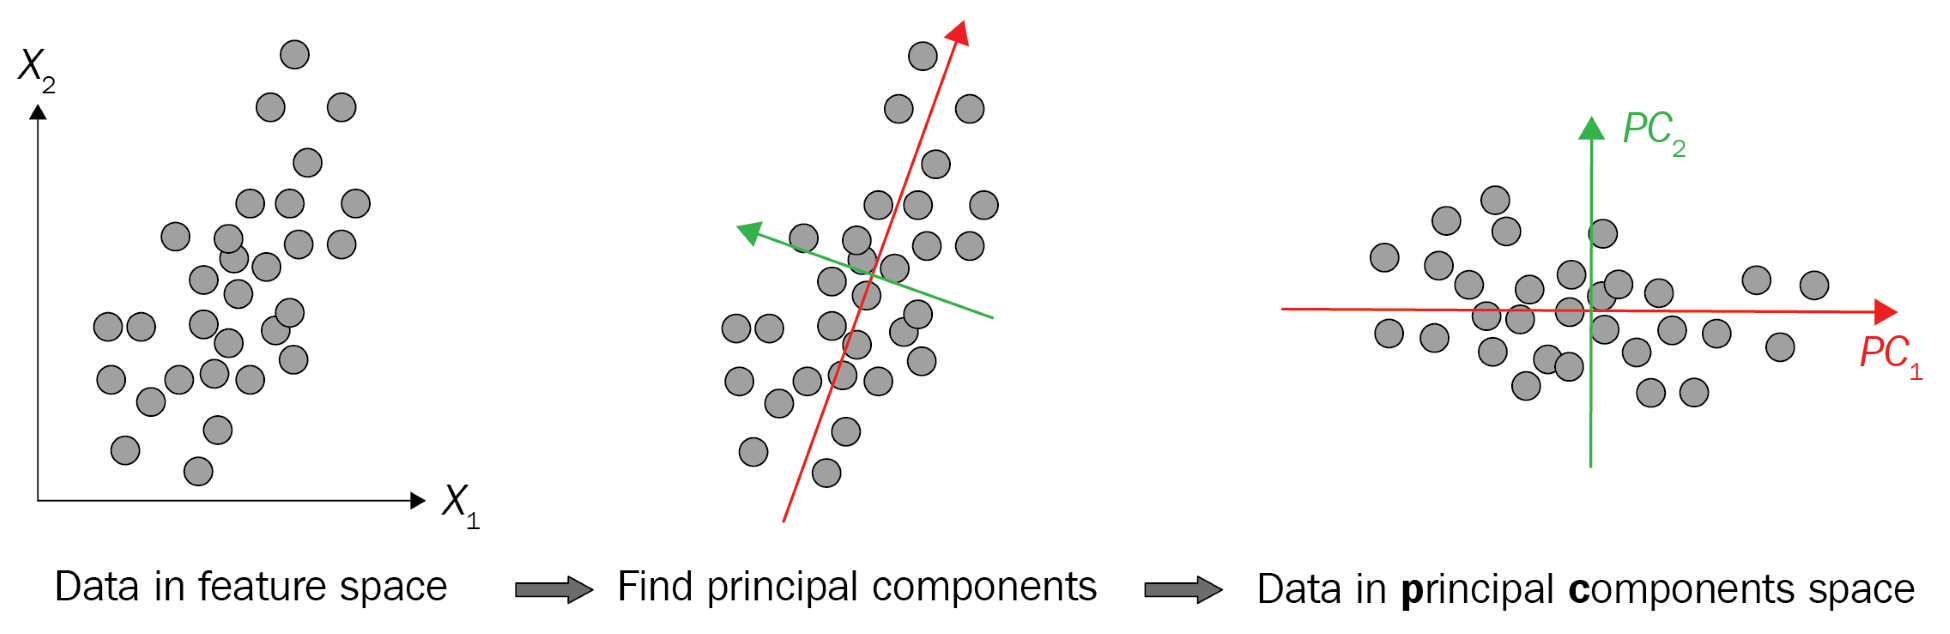

#### Here is an other example of how you can understand 'Dimensionality Reduction'

Let’s think about how we reduce dimensions and create “latent features” internally every day. 

* For example, people invent concepts like “coolness,” but we can’t directly measure how cool someone is. Other people exhibit different patterns of behavior, which we internally map or reduce to our one dimension of “coolness.” 

* So coolness is an example of a latent feature in that it’s unobserved and not measurable directly, and we could think of it as reducing dimensions because perhaps it’s a **combination** of many “features” we’ve observed about the person and implictly weighted in our mind.

## Singular Value Decomposition (SVD)

We are going to use SVD for our data set. 

#### **Q1:** How does SVD work?

* The assumption is that few pieces of data in our data set can contain most of the information in our data set. The other information in the matrix is noise or irrelevant.

* To identify the most relevant information we can decompose our original matrix. The decomposition is done to put the original matrix in a new form that is easier to work with. 

The SVD takes an original data set matrix $M$ and decomposes it into three matrices called $U$, $\Sigma$, and $V^T$.
 
$M = U\Sigma V^T$ 

where if $M$ is size $mxn$, then $U$ will be $mxm$, $\Sigma$ will be $mxn$, and $V^T$ will be $nxn$. 

* The decomposition creates the $\Sigma$, which will have only diagonal elements; all other elements of this matrix are 0. 
* The diagonal elements of $\Sigma$ are sorted from largest to smallest. 
* The diagonal elements of $\Sigma$ are called singular values and they correspond to the singular values of our original data set, Data.

To reduce the size of our original matrix we select only the most relevent singular values in $\Sigma$.



<img src="img/SVD.png" alt="SVD" width="500"/>

**The light gray areas show the original data, and the dark gray areas show the only data used in the matrix approximation.**

### **How many dimensions?** 

#### **Q1:** How do we decide how many singular values (dimensions) we want to keep?


You typically want to keep 90% of the energy expressed in the matrix. 
* To calculate the total energy, you add up all the squared singular values. 
* You can then add squared singular values until you reach 90% of the total. 



In [21]:
from sklearn.utils.extmath import randomized_svd

U, Sigma, VT = randomized_svd(prod_matrix.to_numpy(), n_components = min(prod_matrix.shape) )

# ** NOTE ** 
#
# randomized_svd()
#   Computes a truncated randomized SVD.
#
# ** NOTE ** 

# 
# We set -- n_components = min(prod_matrix.shape) -- because we do not know
# yet how many components/dimensions we want to keep. We keep all of them.
# Sigma is a diagonal matrix, it contains at most min(m,n) singolar values.
#

Sigma2=Sigma**2
print(f"Tot Energy: {sum(Sigma2)}")
print(f"90%: {sum(Sigma2)*0.9}")

#
# We use the following function to select the number of dimensions to keep
#

def get_number_of_dimensions_to_keep( S, max_d ):
    S2 = S**2
    energy_90 = sum(S2)*0.9
    for i in range(max_d):
        if sum(S2[:i]) >= energy_90:
            return i
    return max_d

n_comp = get_number_of_dimensions_to_keep(Sigma,prod_matrix.shape[0])
print(f"Number of components: {n_comp}")


Tot Energy: 382923.9999999998
90%: 344631.59999999986
Number of components: 405


#### We now compute the approximated matrix we will use for our recommander system

In [22]:
from sklearn.decomposition import TruncatedSVD

SVD = TruncatedSVD(n_components=n_comp)
de_matrix = SVD.fit_transform(prod_matrix)

print(f"Original matrix: {prod_matrix.shape}")
print(f"Approximation: {de_matrix.shape}")

Original matrix: (1398, 19101)
Approximation: (1398, 405)


## **Similarity (item-based)** 

Three commons approaches to measure similarity are:

* Euclidian distance
* Pearson correlation
* Cosine similarity

For our amazon data set we are going to use Pearson correlation that is efficiently implemented in Numpy.

### **Pearson correlation**

Pearson correlation is insensitive to the magnitude of users’ ratings. 

* Say one person is manic and rates everything with 5s; another person isn’t so happy and rates everything with 1s. The Pearson correlation tells us that these two vectors are equal.

* Both Pearson correlation and cosine similarity are invariant to scaling, i.e. multiplying all elements by a nonzero constant. 
  * Pearson correlation is also invariant to adding any constant to all elements. 
    * $pearson(X_1, X_2)$ == $pearson(X_1, a*X_2+b)$
    * $cos(X_1, X_2)$ != $cos(X_1, a*X_2+b)$
    * $cos(X_1, X_2)$ == $cos(X_1, a*X_2)$


In [23]:
import numpy as np

# We compute the Pearson correlation between products pairs

corr_matrix = np.corrcoef(de_matrix)
corr_matrix.shape

# corr_matrix[i][j] contains the correlation between product i and product j


(1398, 1398)

#### **Q1:** How do we suggest similar products to a given product?

We use the correlation matrix to list the products that are the most similar to the given product.

In [24]:
# Given a product ID we can suggest new products

prod_ID = '602260074X'

# We need the index of the product to find it in the correlation matrix.

product_names = list(prod_matrix.index)
prod_idx = product_names.index(prod_ID)

print( f"Product ID: {prod_ID}, index: {prod_idx}")

# List of correlation values for product prod_ID whose index is prod_idx
                           
corr_products = corr_matrix[prod_idx]


Product ID: 602260074X, index: 90


#### We can recommend similar products sorting them by correlation values.

In [25]:
rec_df = pd.DataFrame( {"ProdId":prod_matrix.index, "Corr":corr_products} ).sort_values(by='Corr', ascending=False)

# We remove the current product from the list

rec_df[ rec_df['ProdId'] != prod_ID ].head(10)


,ProdId,Corr
506,9790790996,0.012376
505,9790790988,0.012370
1243,B0000536PC,0.011887
727,B000050RO8,0.011878
519,9790792115,0.011571
828,B000052YLU,0.011051
481,9790789343,0.011032
1148,B00005336V,0.010796
877,B000052YPF,0.010746
342,9790776144,0.009461


### **Exercise**

* **Q1:** Write a function that takes in input a product ID and return as output a list of recommended products.


In [26]:
#
# The code goes here!
#    

### **Recommending new products to users.**

#### **Q1:** How do we suggest new products to customers?

In [27]:

def item_based_suggestions( user_id ): 
    
    suggestions = defaultdict(float)
    
    # We get the list of products of <user_id>
    user_prod = [ prod for prod in ratings[ ratings['UserId'] == user_id ]['ProductId'] ]
    # NOTE: ratings is the catted data set
  
    # For each product in the (user) list we
    # get the list of correlated products
    for prod_id in user_prod: 
        prod_idx = product_names.index(prod_id)
        corr_products = corr_matrix[prod_idx]
        for i,p in enumerate(product_names):
            # We skip the product already rated by the user
            if p == prod_id: 
                continue
            suggestions[p] += corr_products[i]

    suggestions = sorted( suggestions.items(), key= lambda s: s[1], reverse=True)

    return suggestions


In [28]:
item_based_suggestions('A39HTATAQ9V7YF')[:5]

[('B00005377T', 0.6625359032710745),
 ('B00005321X', 0.5950237241989481),
 ('B000052ZEK', 0.5845604792527873),
 ('9790792557', 0.5664019625408924),
 ('9742189889', 0.5545092826126011)]

In [29]:
item_based_suggestions('AO76PCGL4LTDY')[:5]

[('B00005375E', 0.019738071186788813),
 ('9790776691', 0.019549494920828477),
 ('B0000531VG', 0.01930245736314842),
 ('B0000531QP', 0.018700548664557747),
 ('9790795076', 0.018678288971415907)]